## Data Exploration

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import AgglomerativeClustering
import tensorflow as tf
from tensorflow import keras

In [ ]:
df=pd.read_csv("/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [ ]:
df.iloc[:,-1].value_counts()

 Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# checking null entry count
pd.set_option('display.max_rows', None)

df.isnull().sum()

 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
 Fwd Packet Length Std           0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
Flow Bytes/s                    15
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean                    0
 Bwd IAT Std                     0
 Bwd IAT Max        

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import GPy
from sklearn.impute import SimpleImputer

# Load your dataset
final_df = pd.read_csv('/content/final_dataset(1).csv')

# Split features (images) and labels
X = final_df.drop('Damage_Type', axis=1).values / 255  # Normalize pixel values
y = final_df['Damage_Type'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GPLVM model
latent_dim = 2  # Adjust as needed
kernel = GPy.kern.RBF(latent_dim)
gplvm = GPy.models.GPLVM(X_train, input_dim=latent_dim, kernel=kernel)

# Optimize the GPLVM model
gplvm.optimize(messages=True)

# Project the training and testing data into the latent space
X_train_latent = gplvm.predict(X_train)[0]
X_test_latent = gplvm.predict(X_test)[0]

# Impute NaN values in the latent space representations
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy as needed
X_train_latent_imputed = imputer.fit_transform(X_train_latent)
X_test_latent_imputed = imputer.transform(X_test_latent)

# Impute NaN values in the target labels
imputer = SimpleImputer(strategy='most_frequent')  # You can adjust the strategy as needed
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train a classifier (Random Forest) on the imputed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_latent_imputed, y_train_imputed)

# Evaluate the classifier
y_pred = clf.predict(X_test_latent_imputed)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.26      0.19      0.22       303
           1       0.07      0.04      0.05       101
           2       0.15      0.08      0.10        65
           3       0.13      0.08      0.10        71
           4       0.06      0.02      0.03        57
           5       0.51      0.71      0.59       579

    accuracy                           0.41      1176
   macro avg       0.20      0.19      0.18      1176
weighted avg       0.34      0.41      0.37      1176



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import GPy
from sklearn.impute import SimpleImputer

# Load your dataset
final_df = pd.read_csv('/content/final_dataset(1).csv')

# Split features (images) and labels
X = final_df.drop('Damage_Type', axis=1).values / 255  # Normalize pixel values
y = final_df['Damage_Type'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GPLVM model
latent_dim = 2  # Adjust as needed
kernel = GPy.kern.RBF(latent_dim)
gplvm = GPy.models.GPLVM(X_train, input_dim=latent_dim, kernel=kernel)

# Optimize the GPLVM model
gplvm.optimize(messages=True)

# Project the training and testing data into the latent space
X_train_latent = gplvm.predict(X_train)[0]
X_test_latent = gplvm.predict(X_test)[0]

# Impute NaN values in the latent space representations
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy as needed
X_train_latent_imputed = imputer.fit_transform(X_train_latent)
X_test_latent_imputed = imputer.transform(X_test_latent)

# Impute NaN values in the target labels
imputer = SimpleImputer(strategy='most_frequent')  # You can adjust the strategy as needed
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train a classifier (Random Forest) on the imputed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_latent_imputed, y_train_imputed)

# Evaluate the classifier
y_pred = clf.predict(X_test_latent_imputed)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.26      0.19      0.22       303
           1       0.07      0.04      0.05       101
           2       0.15      0.08      0.10        65
           3       0.13      0.08      0.10        71
           4       0.06      0.02      0.03        57
           5       0.51      0.71      0.59       579

    accuracy                           0.41      1176
   macro avg       0.20      0.19      0.18      1176
weighted avg       0.34      0.41      0.37      1176



In [ ]:
flow_bytes_mode = df['Flow Bytes/s'].mode()[0]
flow_packets_mode = df[' Flow Packets/s'].mode()[0]

# Replace null values with the mode in each column
df['Flow Bytes/s'].fillna(flow_bytes_mode, inplace=True)
df[' Flow Packets/s'].fillna(flow_packets_mode, inplace=True)

In [ ]:
len(df)

286467

In [ ]:
subset_df = df.sample(n=5000, random_state=23)  # Sample 5000 rows randomly

In [ ]:
label=subset_df.iloc[:,-1]
X= subset_df.iloc[:,:-1]

In [ ]:
label.value_counts()

 Label
PortScan    2776
BENIGN      2224
Name: count, dtype: int64

In [ ]:
# scaling data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

## Without Manifold Learning

In [ ]:
# Using HAC
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
labels_HAC = agglomerative_clustering.fit_predict(X_normalized)

calinski_harabasz_index = calinski_harabasz_score(X_normalized, labels_HAC)
davies_bouldin_index = davies_bouldin_score(X_normalized, labels_HAC)
silhouette_score_value = silhouette_score(X_normalized, labels_HAC)

# Print the computed metrics
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Score:", silhouette_score_value)

Calinski-Harabasz Index: 1276.0927599687252
Davies-Bouldin Index: 1.413095711030818
Silhouette Score: 0.6764247791928496


In [ ]:
# Using Kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
labels = kmeans.labels_

calinski_harabasz_index = calinski_harabasz_score(X_normalized, labels)
davies_bouldin_index = davies_bouldin_score(X_normalized, labels)
silhouette_score_value = silhouette_score(X_normalized, labels)

# Print the computed metrics
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Score:", silhouette_score_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index: 1303.727936314535
Davies-Bouldin Index: 1.3540022065488249
Silhouette Score: 0.7189405537326858


Using Q-Score

In [ ]:
!git clone https://github.com/zhangys11/pyDRMetrics.git
%cd pyDRMetrics/src/pyDRMetrics
from sklearn.metrics import pairwise_distances
from coranking_matrix import *
import scipy

Cloning into 'pyDRMetrics'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 156 (delta 21), reused 43 (delta 18), pack-reused 105
Receiving objects: 100% (156/156), 22.26 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/pyDRMetrics/src/pyDRMetrics


In [ ]:
X_s_curve_dist=pairwise_distances(X_normalized)
X_s_curve_dist_rank = ranking_matrix(X_s_curve_dist)

def q_score(curve):
  X_s_curve_dist =pairwise_distances(curve, curve)
  X_s_curve_Manifold_dist_rank = ranking_matrix(X_s_curve_dist)
  CR_mds = coranking_matrix(X_s_curve_dist_rank,X_s_curve_Manifold_dist_rank)
  qscores_mds = coranking_matrix_metrics(CR_mds)[6:8]
  return qscores_mds

MDS

In [ ]:
mds = MDS(n_components=3)
X_mds = mds.fit_transform(X_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


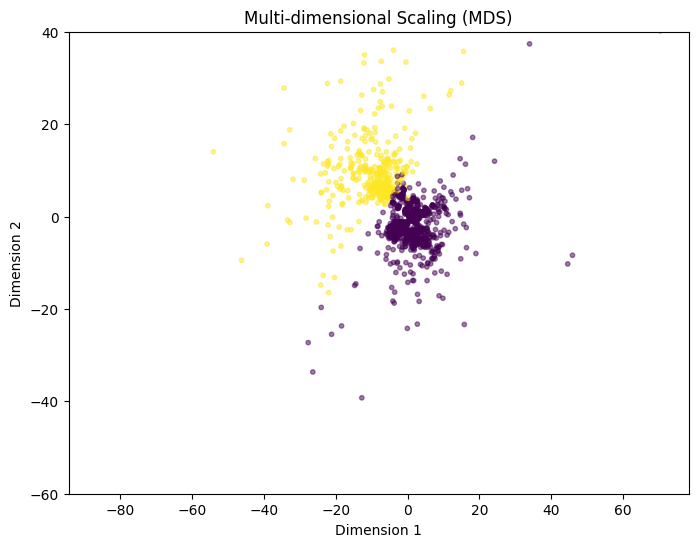

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_mds)
labels_kmeans = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=labels_kmeans, alpha=0.5, cmap='viridis',s=10)
plt.title('Multi-dimensional Scaling (MDS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.ylim(-60, 40)
plt.show()

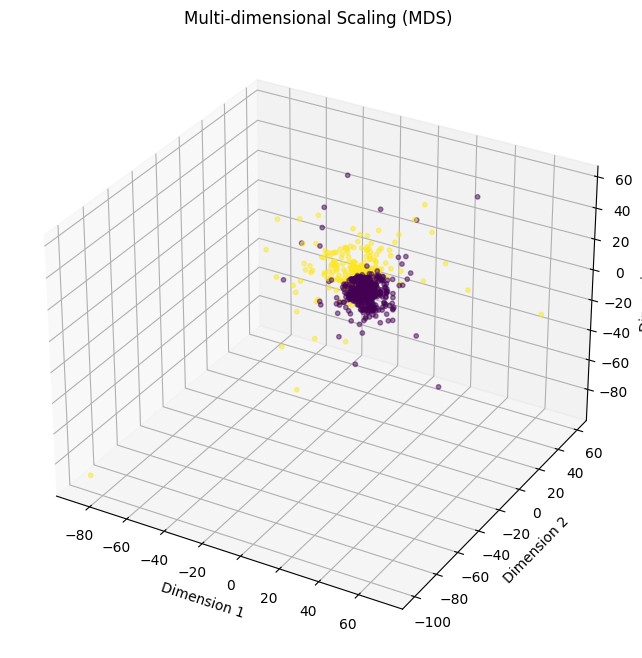

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2], c=labels_kmeans, alpha=0.5,cmap='viridis',s=10)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Multi-dimensional Scaling (MDS)')
plt.show()

## MDS with HAC

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
labels_HAC = agglomerative_clustering.fit_predict(X_mds)
metric(X_mds, labels_HAC)

Calinski-Harabasz Index: 1533.6389119610942
Davies-Bouldin Index: 1.0600275828249845
Silhouette Score: 0.6490774921791905
Q-score (local, global):  (0.7541762836237851, 0.9024075685246591)


## MDS with Kmeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_mds)
labels_kmeans = kmeans.labels_

print("Kmeans:")
metric(X_mds, labels_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans:
Calinski-Harabasz Index: 1683.0365563608616
Davies-Bouldin Index: 1.0030791892707203
Silhouette Score: 0.6817100075256894
Q-score (local, global):  (0.7541762836237851, 0.9024075685246591)


In [ ]:
def metric(X, labels):
  calinski_harabasz_index = calinski_harabasz_score(X, labels)
  davies_bouldin_index = davies_bouldin_score(X, labels)
  silhouette_score_value = silhouette_score(X, labels)

  print("Calinski-Harabasz Index:", calinski_harabasz_index)
  print("Davies-Bouldin Index:", davies_bouldin_index)
  print("Silhouette Score:", silhouette_score_value)
  print("Q-score (local, global): ", q_score(X))


##Plot using Kmeans

MDS, Isomap, LLE, Spectral Embedding

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MDS(n_components=3)
HAC:
Calinski-Harabasz Index: 1477.544474044176
Davies-Bouldin Index: 1.0833618520030697
Silhouette Score: 0.6522058024864877
Q-score (local, global):  (0.7767247184633291, 0.9163723040636217)
Kmeans:
Calinski-Harabasz Index: 1624.6039059696034
Davies-Bouldin Index: 1.0009918998283625
Silhouette Score: 0.6792351805069464
Q-score (local, global):  (0.7767247184633291, 0.9163723040636217)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 12 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

Isomap(n_components=3)
HAC:
Calinski-Harabasz Index: 2543.6437283825962
Davies-Bouldin Index: 0.7797436703208503
Silhouette Score: 0.641786780474165
Q-score (local, global):  (0.6490011333272331, 0.8078037374162619)
Kmeans:
Calinski-Harabasz Index: 2545.3071577034916
Davies-Bouldin Index: 0.7820854437331506
Silhouette Score: 0.6407333382807233
Q-score (local, global):  (0.6490011333272331, 0.8078037374162619)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


LocallyLinearEmbedding(n_components=3)
HAC:
Calinski-Harabasz Index: 1522.0283578879198
Davies-Bouldin Index: 0.43216127426303813
Silhouette Score: 0.7092309304763378
Q-score (local, global):  (0.32881547368223013, 0.6007330004244443)
Kmeans:
Calinski-Harabasz Index: 1710.333983404207
Davies-Bouldin Index: 0.6077206271969325
Silhouette Score: 0.6727940012402832
Q-score (local, global):  (0.32881547368223013, 0.6007330004244443)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SpectralEmbedding(n_components=3)
HAC:
Calinski-Harabasz Index: 2099.6659431264416
Davies-Bouldin Index: 1.3123086558783432
Silhouette Score: 0.3665805100804325
Q-score (local, global):  (0.5584685363321483, 0.7105637372297485)
Kmeans:
Calinski-Harabasz Index: 2174.0720645844417
Davies-Bouldin Index: 1.4271965855244244
Silhouette Score: 0.3732132312019864
Q-score (local, global):  (0.5584685363321483, 0.7105637372297485)


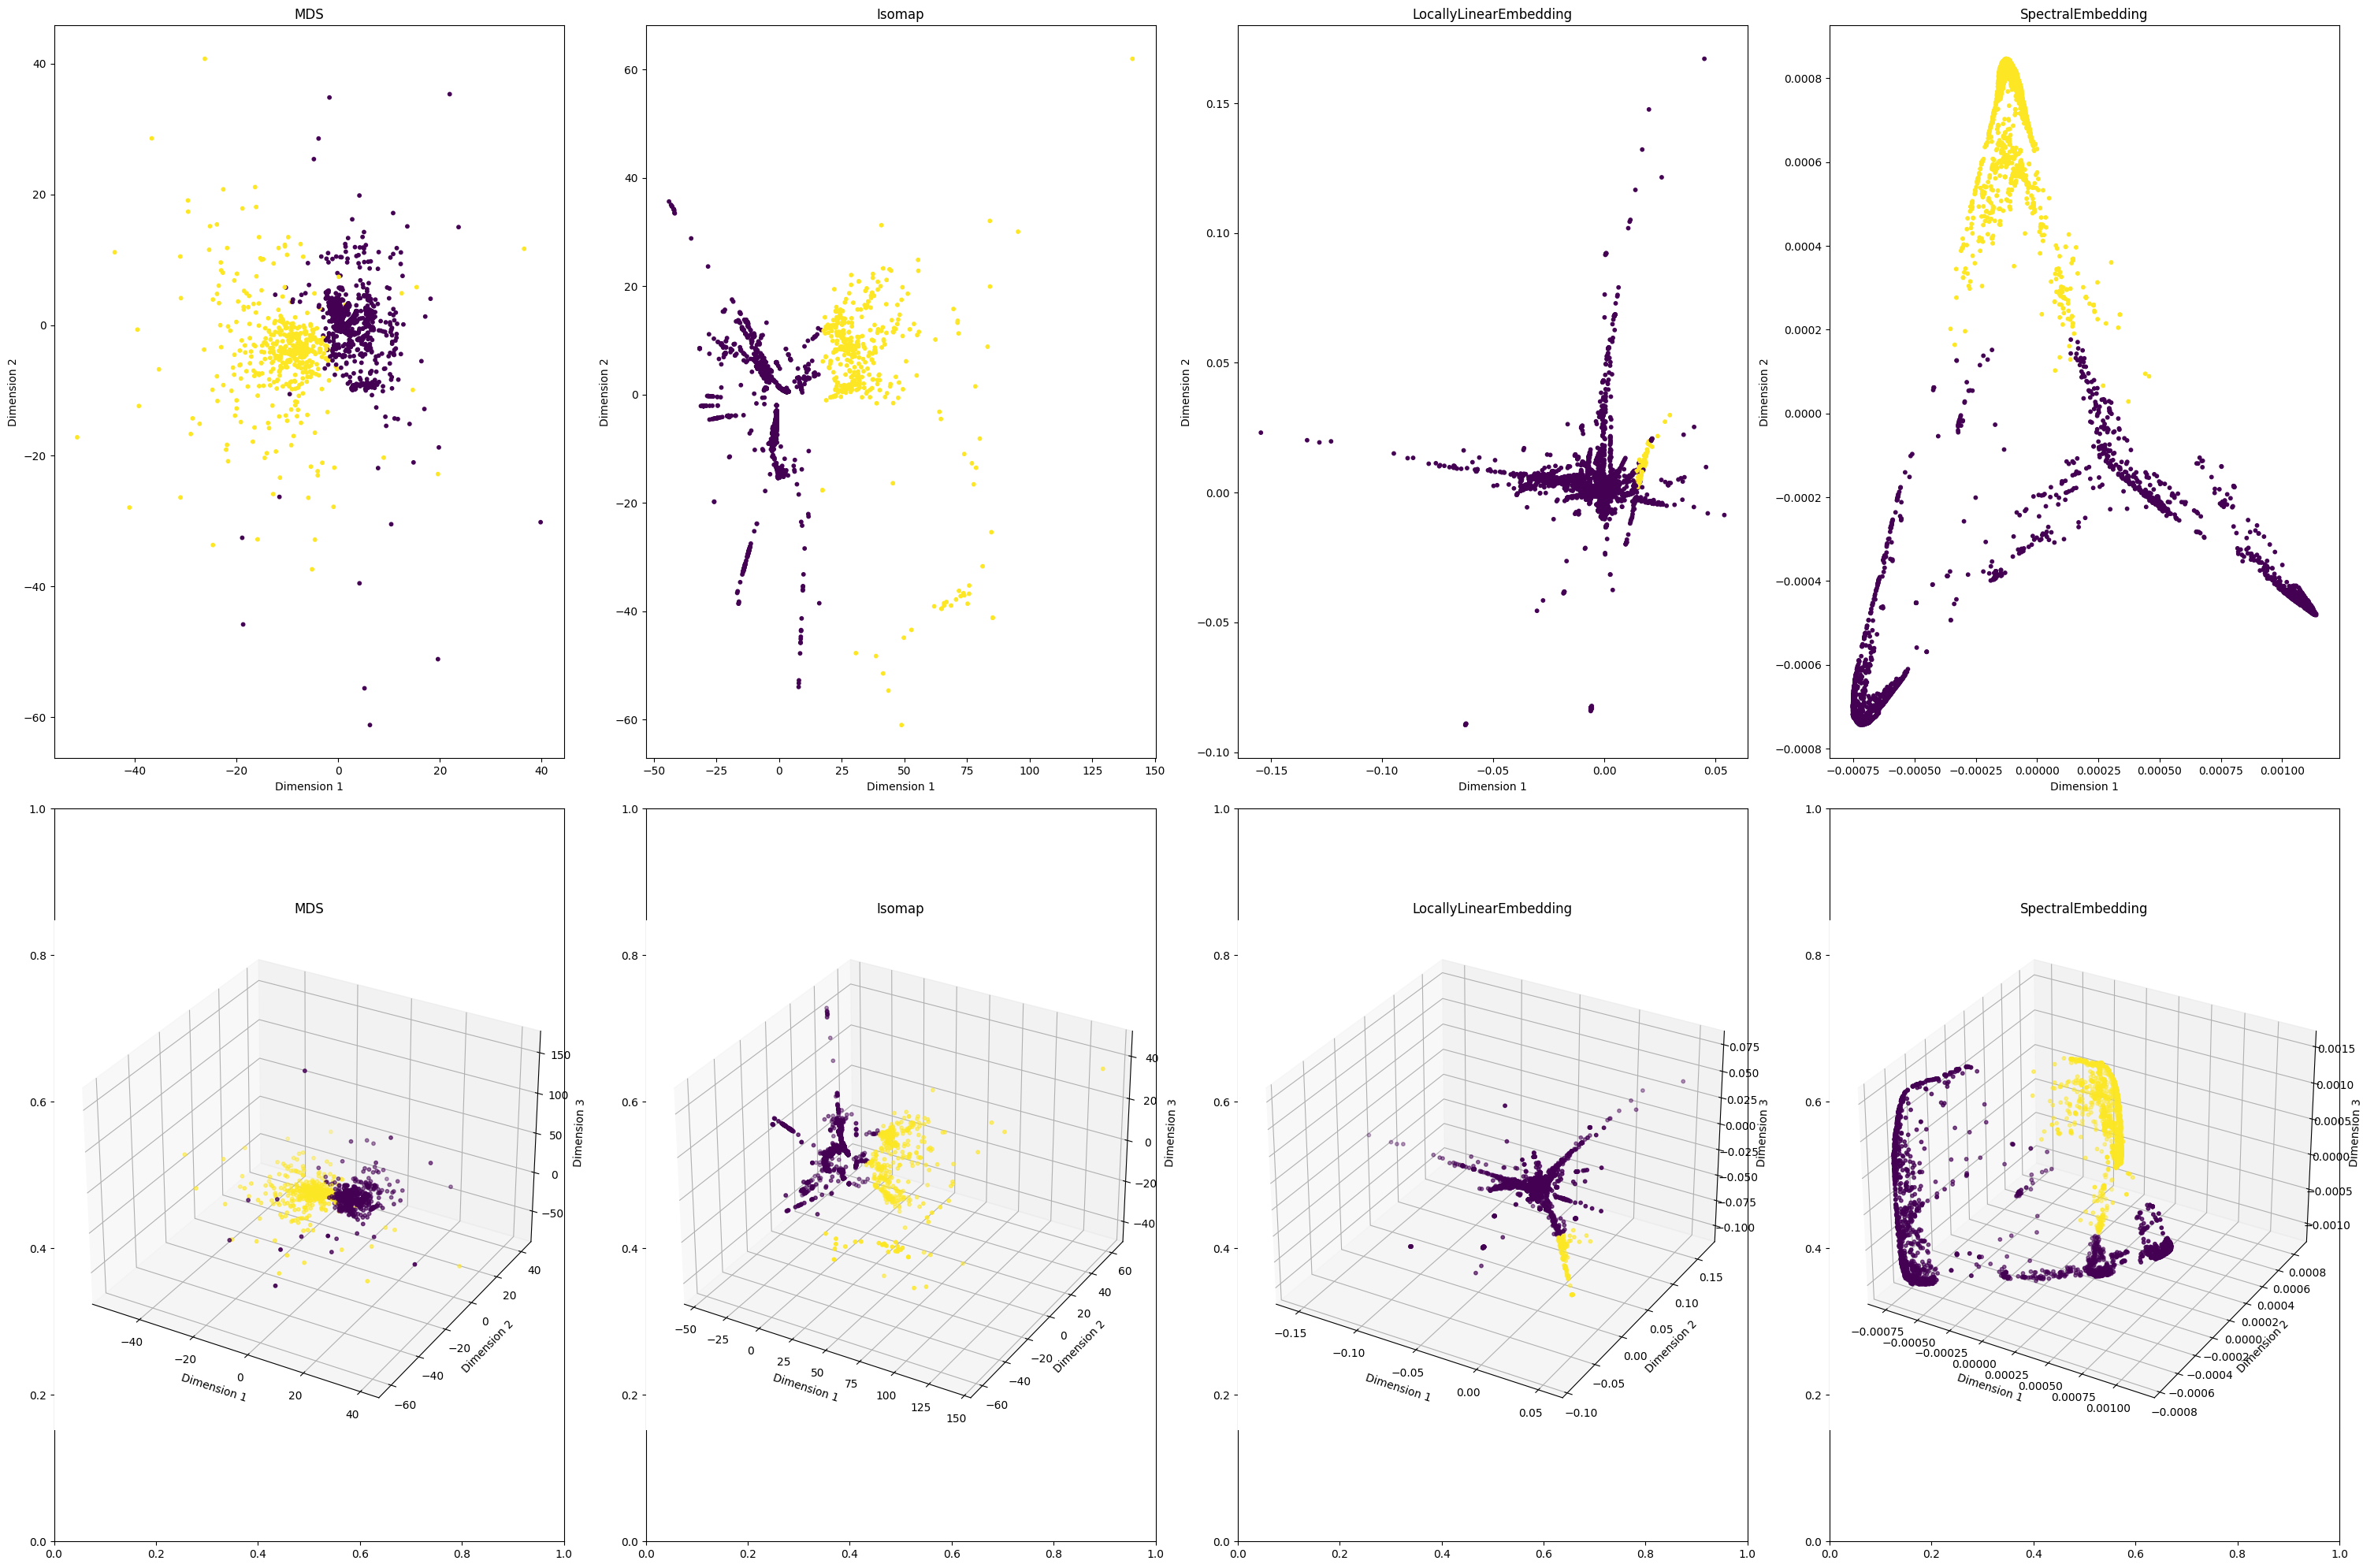

In [ ]:
reducers = [
    MDS(n_components=3),
    Isomap(n_components=3),
    LocallyLinearEmbedding(n_components=3),
    SpectralEmbedding(n_components=3),
]

fig, axes = plt.subplots(2, len(reducers), figsize=(25, 15))
for i, reducer in enumerate(reducers):

    X_reduced = reducer.fit_transform(X_normalized)

    kmeans = KMeans(n_clusters=2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_reduced)

    agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
    labels_HAC = agglomerative_clustering.fit_predict(X_reduced)
    print(reducer)
    print("HAC:")
    metric(X_reduced, labels_HAC)

    print("Kmeans:")
    metric(X_reduced, labels_kmeans)

    # Plot 2D scatter plot
    axes[0, i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmeans, cmap='viridis', s=10)
    axes[0, i].set_title(reducer.__class__.__name__)
    axes[0, i].set_xlabel('Dimension 1')
    axes[0, i].set_ylabel('Dimension 2')

    # Plot 3D scatter plot
    ax = fig.add_subplot(2, len(reducers), len(reducers)+i+1, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels_kmeans, cmap='viridis', s=10)
    ax.set_title(reducer.__class__.__name__)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')


plt.tight_layout()
plt.show()

## Plot using HAC

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MDS(n_components=3)
HAC:
Calinski-Harabasz Index: 1477.544474044176
Davies-Bouldin Index: 1.0833618520030697
Silhouette Score: 0.6522058024864877
Q-score (local, global):  (0.7767247184633291, 0.9163723040636217)
Kmeans:
Calinski-Harabasz Index: 1624.6039059696034
Davies-Bouldin Index: 1.0009918998283625
Silhouette Score: 0.6792351805069464
Q-score (local, global):  (0.7767247184633291, 0.9163723040636217)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 12 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

Isomap(n_components=3)
HAC:
Calinski-Harabasz Index: 2543.6437283825962
Davies-Bouldin Index: 0.7797436703208503
Silhouette Score: 0.641786780474165
Q-score (local, global):  (0.6490011333272331, 0.8078037374162619)
Kmeans:
Calinski-Harabasz Index: 2545.3071577034916
Davies-Bouldin Index: 0.7820854437331506
Silhouette Score: 0.6407333382807233
Q-score (local, global):  (0.6490011333272331, 0.8078037374162619)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


LocallyLinearEmbedding(n_components=3)
HAC:
Calinski-Harabasz Index: 1522.0283578879198
Davies-Bouldin Index: 0.43216127426303813
Silhouette Score: 0.7092309304763378
Q-score (local, global):  (0.32881547368223013, 0.6007330004244443)
Kmeans:
Calinski-Harabasz Index: 1710.333983404207
Davies-Bouldin Index: 0.6077206271969325
Silhouette Score: 0.6727940012402832
Q-score (local, global):  (0.32881547368223013, 0.6007330004244443)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SpectralEmbedding(n_components=3)
HAC:
Calinski-Harabasz Index: 2099.6659431264416
Davies-Bouldin Index: 1.3123086558783432
Silhouette Score: 0.3665805100804325
Q-score (local, global):  (0.5584685363321483, 0.7105637372297485)
Kmeans:
Calinski-Harabasz Index: 2174.0720645844417
Davies-Bouldin Index: 1.4271965855244244
Silhouette Score: 0.3732132312019864
Q-score (local, global):  (0.5584685363321483, 0.7105637372297485)


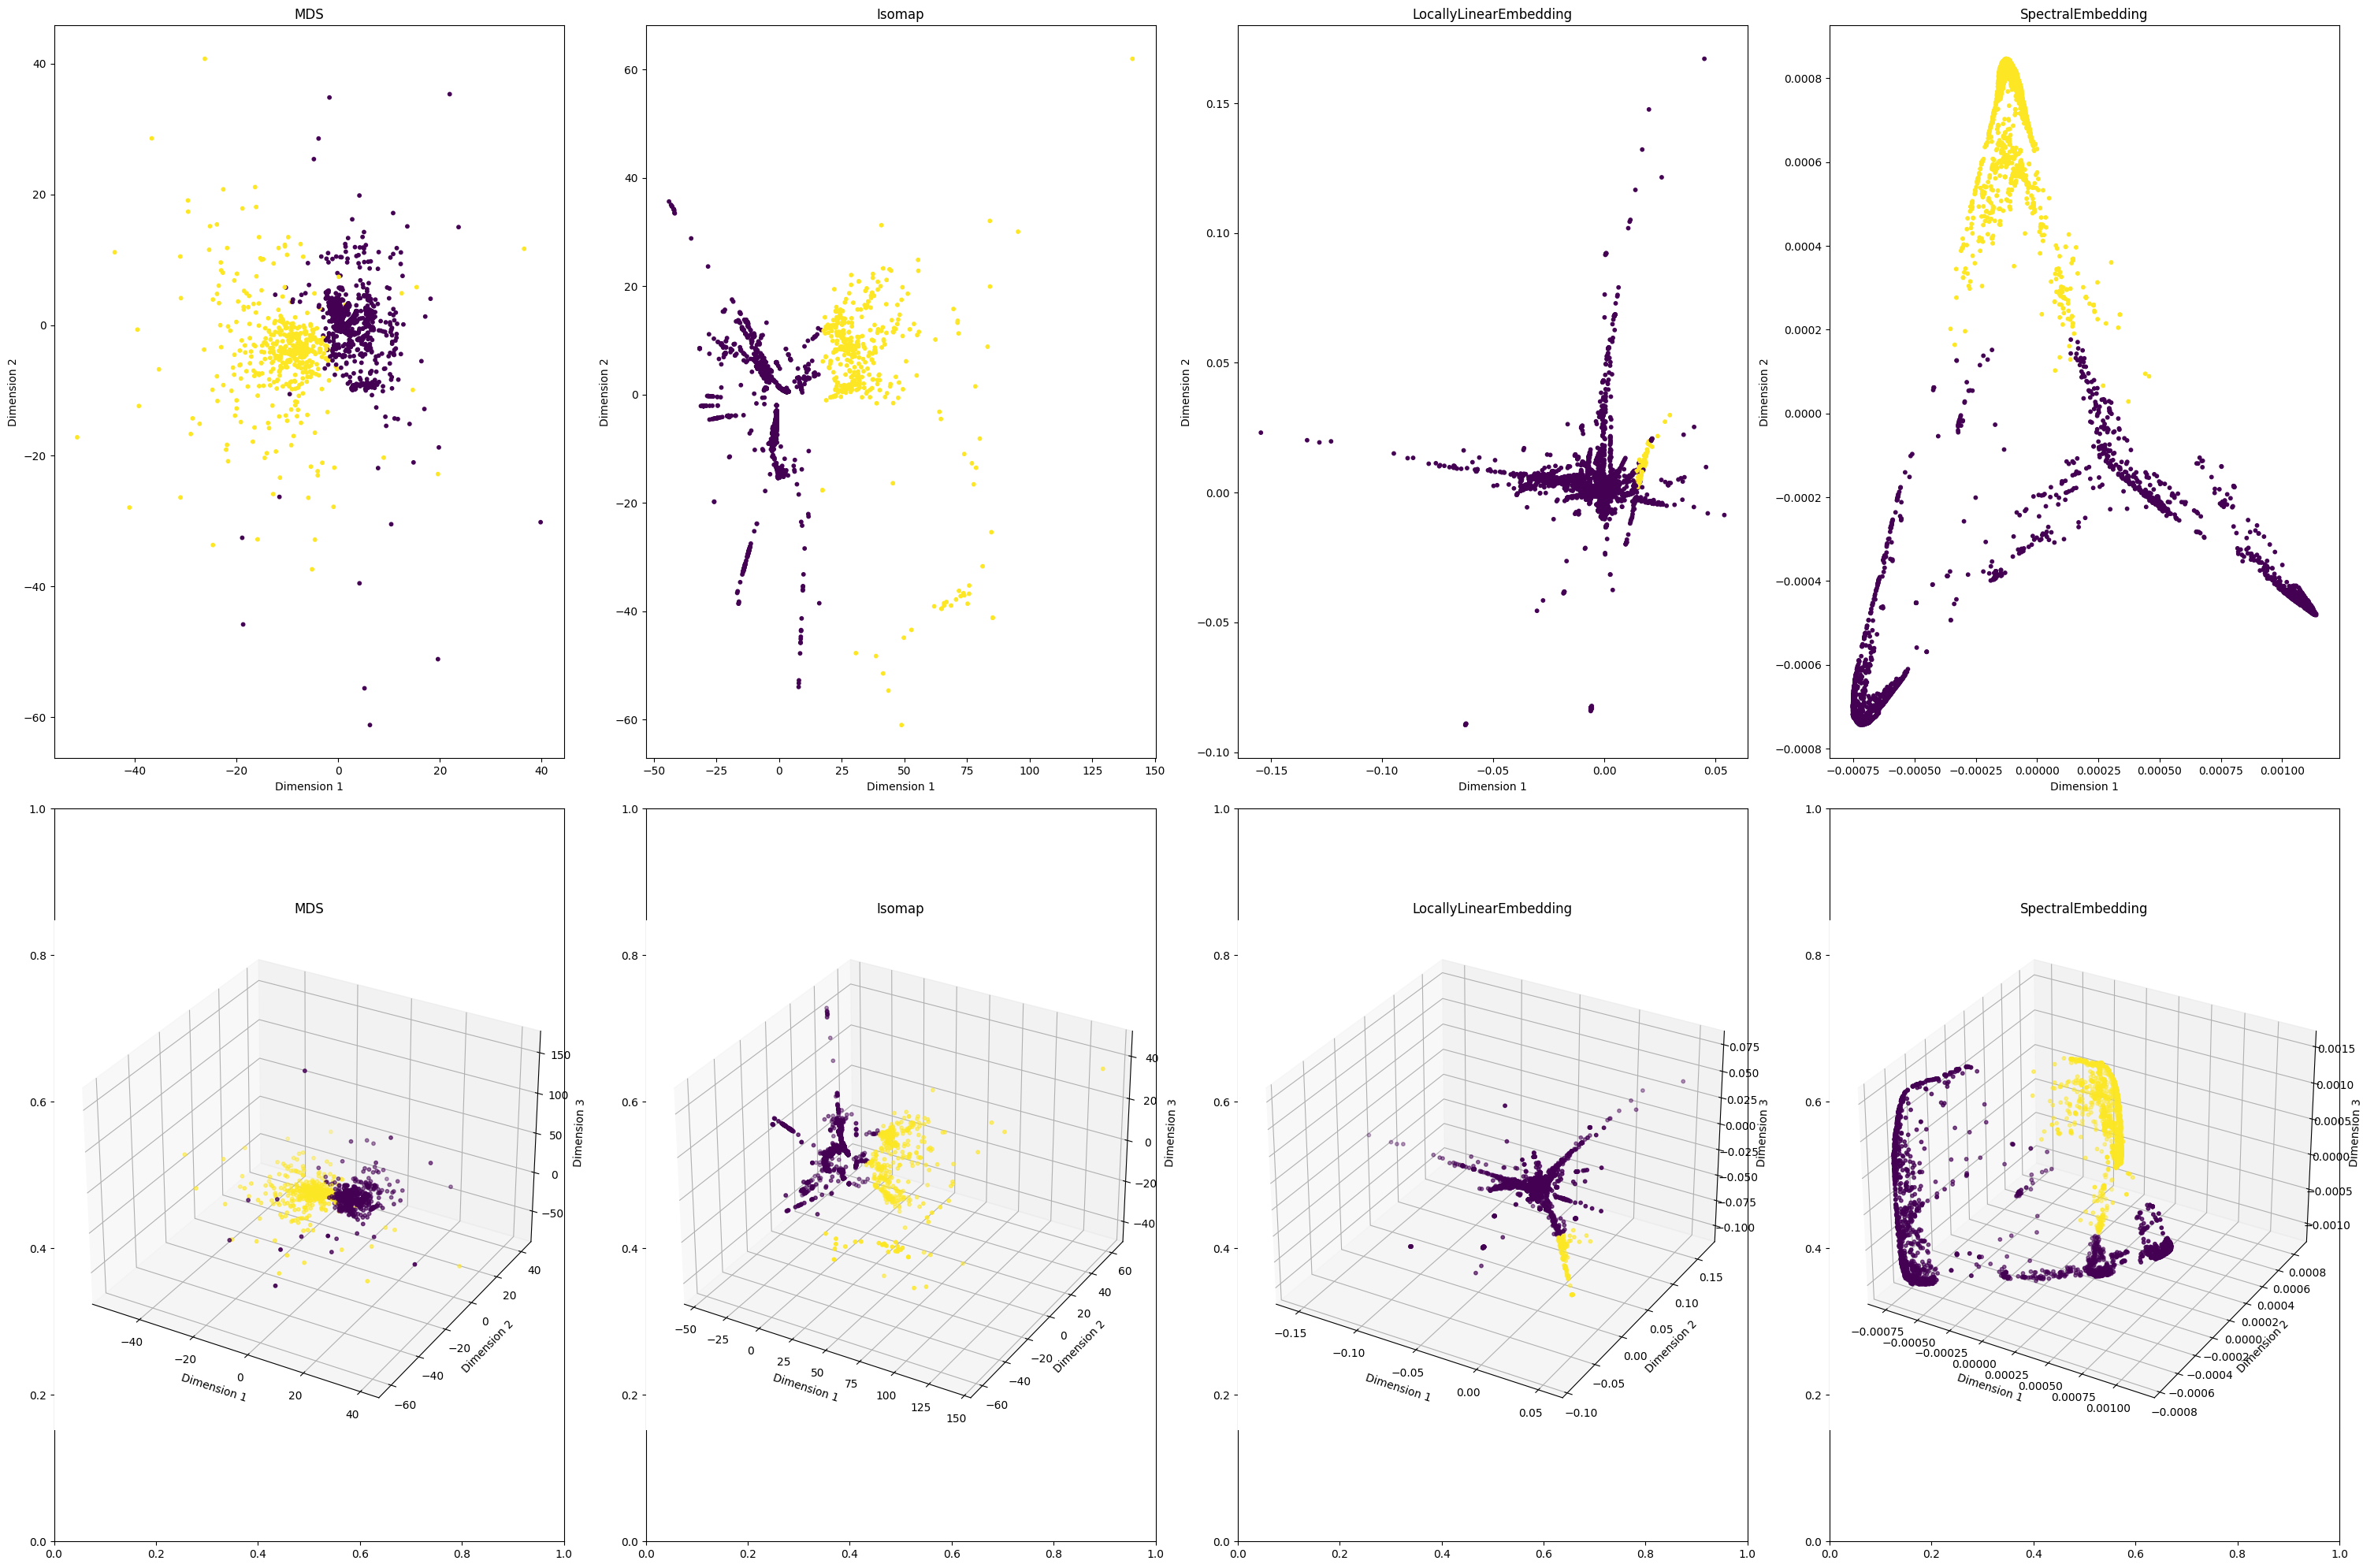

In [ ]:
reducers = [
    MDS(n_components=3),
    Isomap(n_components=3),
    LocallyLinearEmbedding(n_components=3),
    SpectralEmbedding(n_components=3),
]

fig, axes = plt.subplots(2, len(reducers), figsize=(25, 15))
for i, reducer in enumerate(reducers):

    X_reduced = reducer.fit_transform(X_normalized)
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_reduced)

    agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
    labels_HAC = agglomerative_clustering.fit_predict(X_reduced)
    print(reducer)
    print("HAC:")
    metric(X_reduced, labels_HAC)

    print("Kmeans:")
    metric(X_reduced, labels_kmeans)

    # Plot 2D scatter plot
    axes[0, i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_HAC, cmap='viridis', s=10)
    axes[0, i].set_title(reducer.__class__.__name__)
    axes[0, i].set_xlabel('Dimension 1')
    axes[0, i].set_ylabel('Dimension 2')

    # Plot 3D scatter plot
    ax = fig.add_subplot(2, len(reducers), len(reducers)+i+1, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels_HAC, cmap='viridis', s=10)
    ax.set_title(reducer.__class__.__name__)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')


plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 12 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

Calinski-Harabasz Scores:
Isomap: 2545.3071577034952
LocallyLinearEmbedding: 1826.9257206268878
SpectralEmbedding: 2174.0720645844413

Davies-Bouldin Scores:
Isomap: 0.7820854437331498
LocallyLinearEmbedding: 0.5621335339911834
SpectralEmbedding: 1.4271965855244249

Silhouette Scores:
Isomap: 0.6407333382807269
LocallyLinearEmbedding: 0.6884155615948002
SpectralEmbedding: 0.3732132312019739

Q Scores:
Isomap: [0.649001953351925, 0.8078038223815351]
LocallyLinearEmbedding: [0.3039578225752725, 0.6233987409904227]
SpectralEmbedding: [0.5584702448585119, 0.7105639483348121]


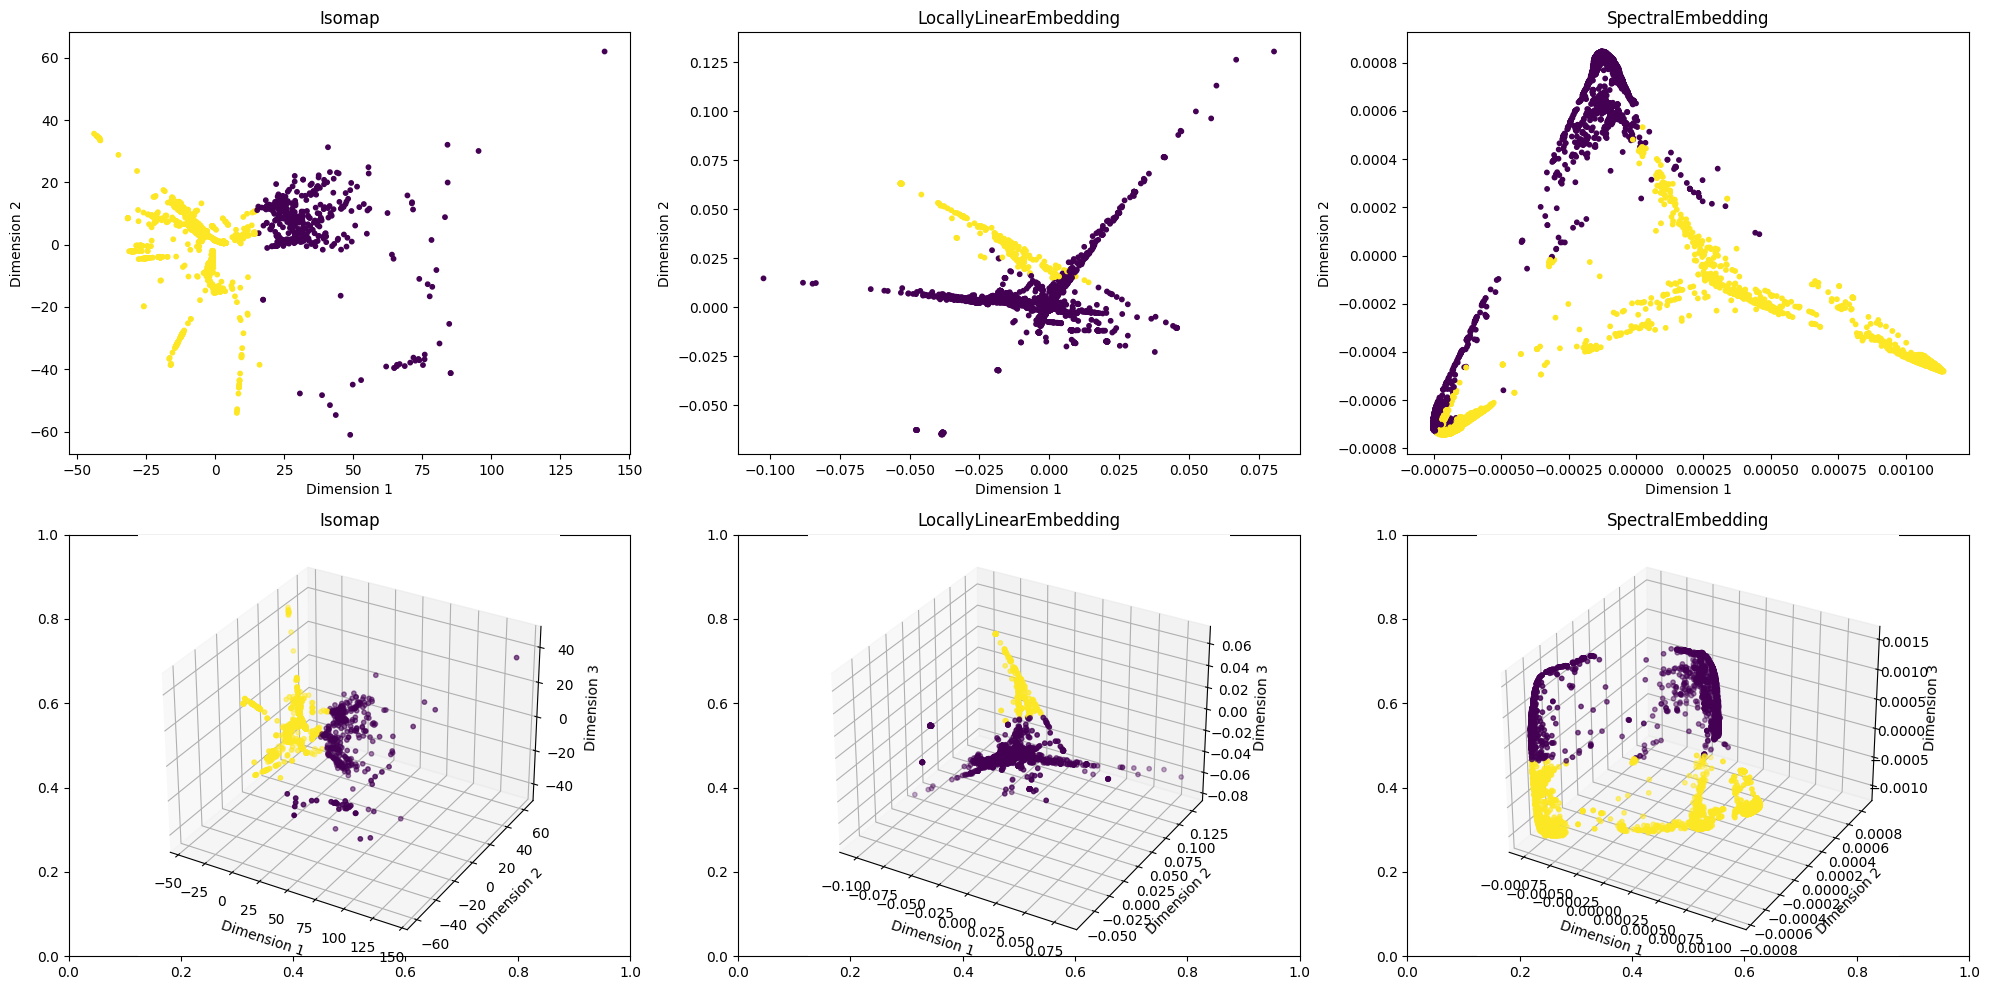

In [ ]:
# Final plots with Kmeans

reducers = [
    Isomap(n_components=3),
    LocallyLinearEmbedding(n_components=3),
    SpectralEmbedding(n_components=3),
]

fig, axes = plt.subplots(2, len(reducers), figsize=(20, 10))

calinski_harabasz_scores = {}
davies_bouldin_scores = {}
silhouette_scores = {}
q_Score={}

for i, reducer in enumerate(reducers):

    X_reduced = reducer.fit_transform(X_normalized)
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)

    calinski_harabasz_index = calinski_harabasz_score(X_reduced, cluster_labels)
    davies_bouldin_index = davies_bouldin_score(X_reduced, cluster_labels)
    silhouette_score_value = silhouette_score(X_reduced, cluster_labels)
    local, global_=q_score(X_reduced)

    calinski_harabasz_scores[reducer.__class__.__name__] = calinski_harabasz_index
    davies_bouldin_scores[reducer.__class__.__name__] = davies_bouldin_index
    silhouette_scores[reducer.__class__.__name__] = silhouette_score_value
    q_Score[reducer.__class__.__name__]= [local, global_]

    # Plot 2D scatter plot
    axes[0, i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', s=10)
    axes[0, i].set_title(reducer.__class__.__name__)
    axes[0, i].set_xlabel('Dimension 1')
    axes[0, i].set_ylabel('Dimension 2')

    # Plot 3D scatter plot
    ax = fig.add_subplot(2, len(reducers), len(reducers)+i+1, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=cluster_labels, cmap='viridis', s=10)
    ax.set_title(reducer.__class__.__name__)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')

print("Calinski-Harabasz Scores:")
for reducer, score in calinski_harabasz_scores.items():
    print(reducer + ":", score)

print("\nDavies-Bouldin Scores:")
for reducer, score in davies_bouldin_scores.items():
    print(reducer + ":", score)

print("\nSilhouette Scores:")
for reducer, score in silhouette_scores.items():
    print(reducer + ":", score)

print("\nQ Scores:")
for reducer, score in q_Score.items():
    print(reducer + ":", score)

plt.tight_layout()
plt.show()

###Autoencoder

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 1.0636 - val_loss: 1.0941
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.9764 - val_loss: 0.9622
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.8331 - val_loss: 0.8399
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.7588 - val_loss: 0.7982
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.7322 - val_loss: 0.7782
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.7174 - val_loss: 0.7651
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.7055 - val_loss: 0.7529
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.6949 - val_loss: 0.7458
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.6887 - val_loss: 0.7423
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.6851 - val_loss: 0.7398

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


HAC:
Calinski-Harabasz Index: 3857.542319702929
Davies-Bouldin Index: 0.6768615024611324
Silhouette Score: 0.72800046
Q-score (local, global):  (0.620541200466993, 0.822391696579182)
Kmeans:
Calinski-Harabasz Index: 4271.125133571855
Davies-Bouldin Index: 0.5710191236544719
Silhouette Score: 0.769292
Q-score (local, global):  (0.620541200466993, 0.822391696579182)


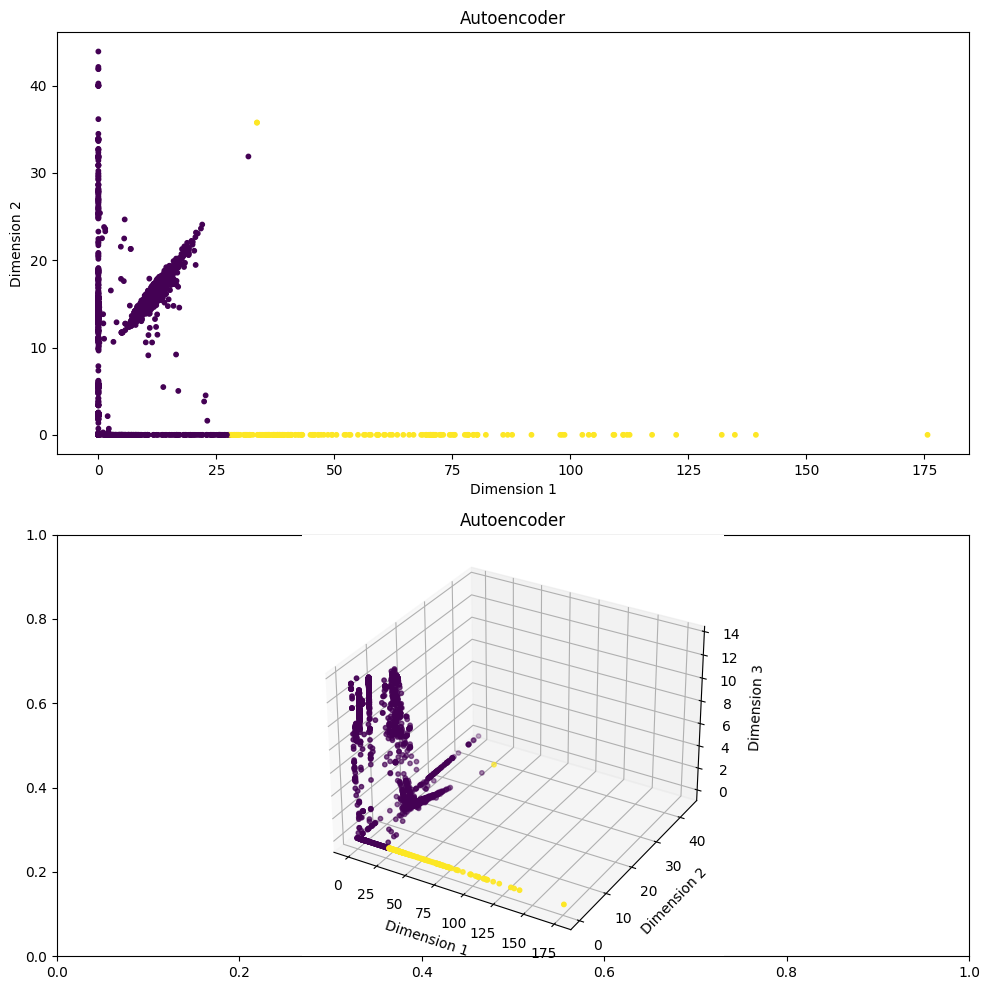

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X_scaled.shape[1]
encoding_dim = 3
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = keras.models.Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

encoder = keras.models.Model(input_layer, encoded)
X_encoded = encoder.predict(X_scaled)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_encoded)

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
labels_HAC = agglomerative_clustering.fit_predict(X_encoded)

print("HAC:")
metric(X_encoded, labels_HAC)

print("Kmeans:")
metric(X_encoded, labels_kmeans)

# Plot 2D scatter plot
axes[0].scatter(X_encoded[:, 0], X_encoded[:, 1], c=labels_kmeans, cmap='viridis', s=10)
axes[0].set_title('Autoencoder')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')

# Plot 3D scatter plot
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.scatter(X_encoded[:, 0], X_encoded[:, 1], X_encoded[:, 2], c=labels_kmeans, cmap='viridis', s=10)
ax.set_title('Autoencoder')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.tight_layout()
plt.show()


## Latent Map Gaussian Processes

In [ ]:
!pip3 install Gpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.8 MB/s eta 0:00:00


In [ ]:
import GPy
import pickle

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

N, D = X_scaled.shape[0], X_scaled.shape[1]
X_reshaped = X_scaled.reshape(N, D)

k = 3
gplvm = GPy.models.GPLVM(X_reshaped, input_dim=D, kernel=GPy.kern.RBF(k))
_ = gplvm.optimize(messages=True)

file_path = "/content/gplvm_model.pkl"
with open(file_path, "wb") as f:
    pickle.dump(gplvm, f)

In [ ]:
# Load the saved model
file_path = "/content/gplvm_model.pkl"
with open(file_path, "rb") as f:
    loaded_model = pickle.load(f)

 /usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


HAC:
Calinski-Harabasz Index: 32971.64437543412
Davies-Bouldin Index: 0.1393392568710069
Silhouette Score: 0.9988053866485412
Q-score (local, global):  (0.3951752911925921, 0.8967497543884667)
Kmeans:
Calinski-Harabasz Index: 32971.64437543412
Davies-Bouldin Index: 0.1393392568710069
Silhouette Score: 0.9988053866485412
Q-score (local, global):  (0.3951752911925921, 0.8967497543884667)


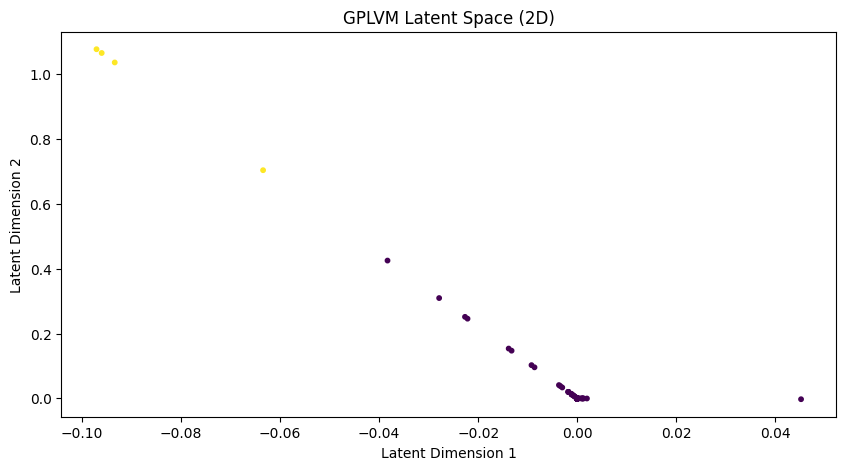

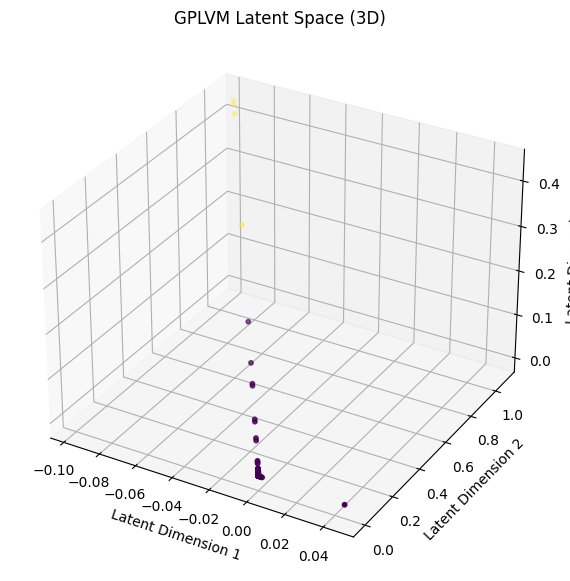

In [ ]:
X_encoded_np = loaded_model.predict(X_reshaped)

X_encoded_1, X_encoded_2 = X_encoded_np

X_encoded_concatenated = np.concatenate((X_encoded_1, X_encoded_2), axis=1)

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_encoded_concatenated)

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
labels_HAC = agglomerative_clustering.fit_predict(X_encoded_concatenated)

print("HAC:")
metric(X_encoded_concatenated, labels_HAC)

print("Kmeans:")
metric(X_encoded_concatenated, labels_kmeans)


# Plot 2D scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(X_encoded_concatenated[:, 0], X_encoded_concatenated[:, 1], c=labels_kmeans, cmap='viridis', s=10)
plt.title("GPLVM Latent Space (2D)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_encoded_concatenated[:, 0], X_encoded_concatenated[:, 1], X_encoded_concatenated[:, 2], c=labels_kmeans, cmap='viridis', s=10)
ax.set_title("GPLVM Latent Space (3D)")
ax.set_xlabel("Latent Dimension 1")
ax.set_ylabel("Latent Dimension 2")
ax.set_zlabel("Latent Dimension 3")
plt.show()

## Comparison Plot

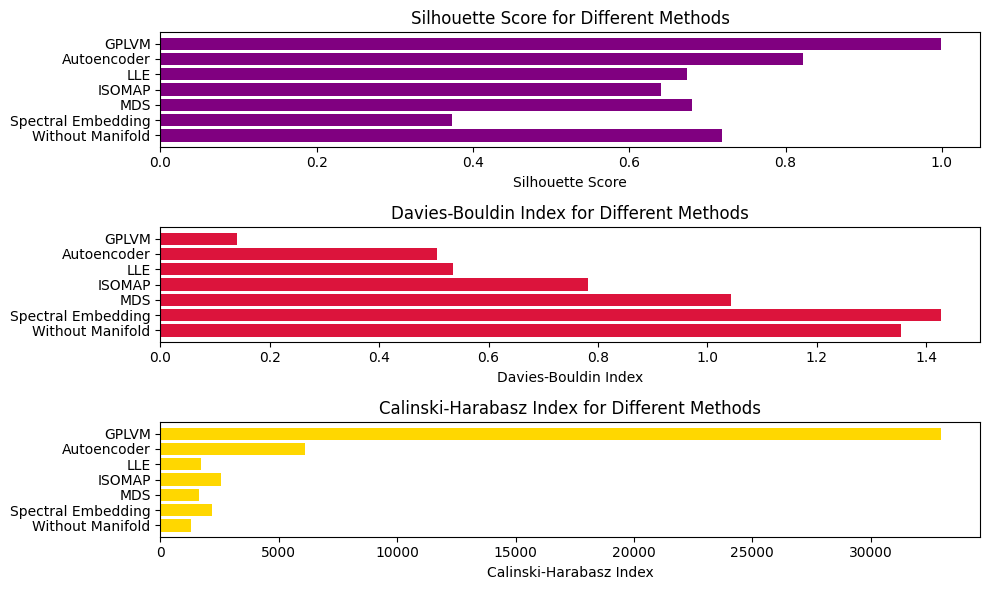

In [ ]:
methods = ['Without Manifold', 'Spectral Embedding', 'MDS', 'ISOMAP', 'LLE', 'Autoencoder', 'GPLVM']
silhouette_scores = [0.718940554, 0.373213231, 0.679576275, 0.640733338, 0.673199087, 0.8224786, 0.998805387]
davies_bouldin_indices = [1.354002207, 1.427196586, 1.042854703, 0.782085444, 0.535670623, 0.504951597, 0.139339257]
calinski_harabasz_indices = [1303.727936, 2174.072065, 1608.355976, 2545.307158, 1721.240038, 6099.638114, 32971.64438]

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.barh(methods, silhouette_scores, color='purple')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Score for Different Methods')

plt.subplot(3, 1, 2)
plt.barh(methods, davies_bouldin_indices, color='crimson')
plt.xlabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Methods')

plt.subplot(3, 1, 3)
plt.barh(methods, calinski_harabasz_indices, color='gold')
plt.xlabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Methods')

plt.tight_layout()
plt.show()